# Exemplo de Algoritmo de Equações Recursivas
# Circuito RC

In [1]:
import numpy as np
import control
import math
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from control_utils import *

# Exercicios do Slide 7

1 - Plotar no MATLAB a evolução temporal da resposta do sistema do exemplo 1 como f(t), f(KT) e a solução da equação recursiva f(KT).

Vc(0) = 100 V;

R = NT ohm;

C = 1000 uF;

Tf = NT*10 ms;

T = 5 ms.

In [8]:
NT = len('LeonardoSantiagoBenitezPereira')
V0 = 100
R = NT
C = 1000e-6 #1000uF


Io = V0/R;            # valor inicial
T = .005;             # período de amostragem
RC = R*C;             # constante RC
Tf = NT*0.01;         # tempo final de simulação
Kmax = int(Tf/T+1);


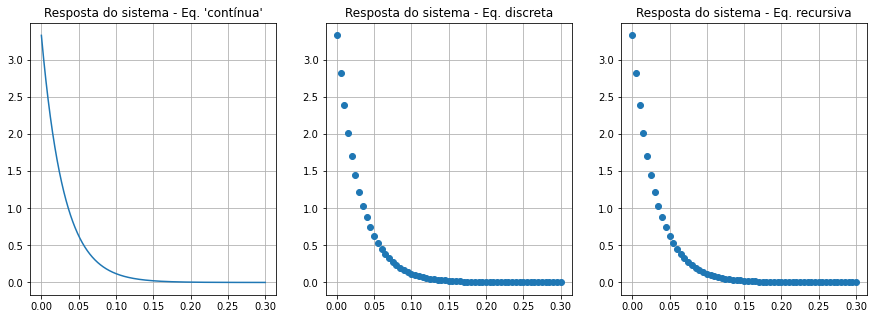

In [9]:
plt.subplots(1,3, figsize=(15, 5))

# Equação "contínua"
t = np.linspace(0, Tf, 999);
I1 = Io*np.exp(-t/RC);

plt.subplot(1,3,1)
plt.title("Resposta do sistema - Eq. 'contínua'")
plt.grid(True)
plt.plot(t,I1)


# Equação discreta
k = np.linspace(0, Tf/T, Kmax);
I2 = Io*np.exp(-k*T/RC);

plt.subplot(1,3,2)
plt.title("Resposta do sistema - Eq. discreta")
plt.grid(True)
plt.plot(k*T, I2,'o')

## Equação recursiva
I3 = np.zeros(Kmax);
I3[0] = Io;   # para k = 0
a = np.exp(-T/RC);
for j in range(1,Kmax):
    I3[j]=a*I3[j-1];
    
assert_almost_equal(I2, I3)
plt.subplot(1,3,3)
plt.title("Resposta do sistema - Eq. recursiva")
plt.grid(True)
plt.plot(k*T, I3,'o')

2 - Plotar no MATLAB a evolução temporal da resposta ao degrau do sistema
do exemplo 2 como f(t), f(KT) e a solução da equação recursiva f(KT).

E = 10 V;

R = NT ohm;

C = 1000 uF;

Tf = NT*10 ms;

T = 5 ms.

Consideraremos o circuito inicialmente descarregado

In [43]:
NT = len('LeonardoSantiagoBenitezPereira')
V0 = 0
R = NT
C = 1000*10e-6


Io = V0/R;            # valor inicial
T = .005;             # período de amostragem
RC = R*C;             # constante RC
Tf = NT*0.01;         # tempo final de simulação
Kmax = int(Tf/T+1);

E=10
V0 = 0
T = .005;             # período de amostragem
RC = R*C;             # constante RC
Tf = NT*0.01;         # tempo final de simulação
Kmax = int(Tf/T+1);

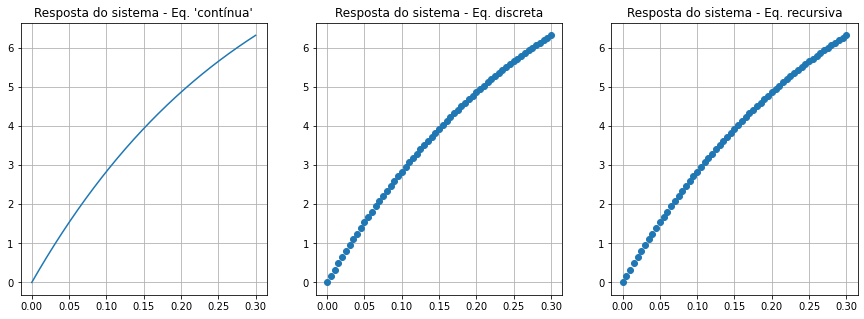

In [44]:
plt.subplots(1,3, figsize=(15, 5))

# Sistema "contínuo"
t = np.linspace(0, Tf, 999);
V1 = E + (V0-E)*np.exp(-t/RC)

plt.subplot(1,3,1)
plt.title("Resposta do sistema - Eq. 'contínua'")
plt.grid(True)
plt.plot(t,V1)

# Equação discreta
k = np.linspace(0, Tf/T, Kmax);
V2 = E + (V0-E)*np.exp(-k*T/RC)

plt.subplot(1,3,2)
plt.title("Resposta do sistema - Eq. discreta")
plt.grid(True)
plt.plot(k*T, V2,'o')

## Equação recursiva
V3 = np.zeros(Kmax);
V3[0] = V0;   # para k = 0
a = np.exp(-T/RC)
b = 1 - np.exp(-T/RC)
for j in range(1,Kmax):
    V3[j]=a*V3[j-1] + b*E;
    
plt.subplot(1,3,3)
plt.title("Resposta do sistema - Eq. recursiva")
plt.grid(True)
plt.plot(k*T, V3,'o')